<a href="https://colab.research.google.com/github/Varshithayama/abc...-/blob/main/tabla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm.auto import tqdm

sns.set_style('darkgrid')

In [2]:
!pwd

/content


Data Exploration

In [ ]:
train = pd.read_csv('/content/multilabel_classification(7).csv')
print(train.shape)
train.head()

(7943, 2)


,Image_Name,"Classes(motorcycle, truck, boat, bus, cycle, , , , , , , sitar, ektara, flutes, tabla, harmonium)"
0,image1.jpg,bus
1,image2.jpg,sitar
2,image3.jpg,flutes
3,image4.jpg,bus
4,image5.jpg,bus


In [ ]:
train.columns

Index(['Image_Name', ' Classes(motorcycle, truck, boat, bus, cycle, , , , , , , sitar, ektara, flutes, tabla, harmonium)'], dtype='object')

In [ ]:
train.rename(columns = {' Classes(motorcycle, truck, boat, bus, cycle, , , , , , , sitar, ektara, flutes, tabla, harmonium)':'labels'}, inplace = True)

In [ ]:
train.columns

Index(['Image_Name', 'labels'], dtype='object')

In [ ]:
train

,Image_Name,labels
0,image1.jpg,bus
1,image2.jpg,sitar
2,image3.jpg,flutes
3,image4.jpg,bus
4,image5.jpg,bus
...,...,...
7938,image7839.jpg,ektara flutes tabla harmonium
7939,image7840.jpg,ektara flutes tabla harmonium
7940,image7841.jpg,ektara flutes tabla harmonium
7941,image7842.jpg,ektara flutes tabla harmonium


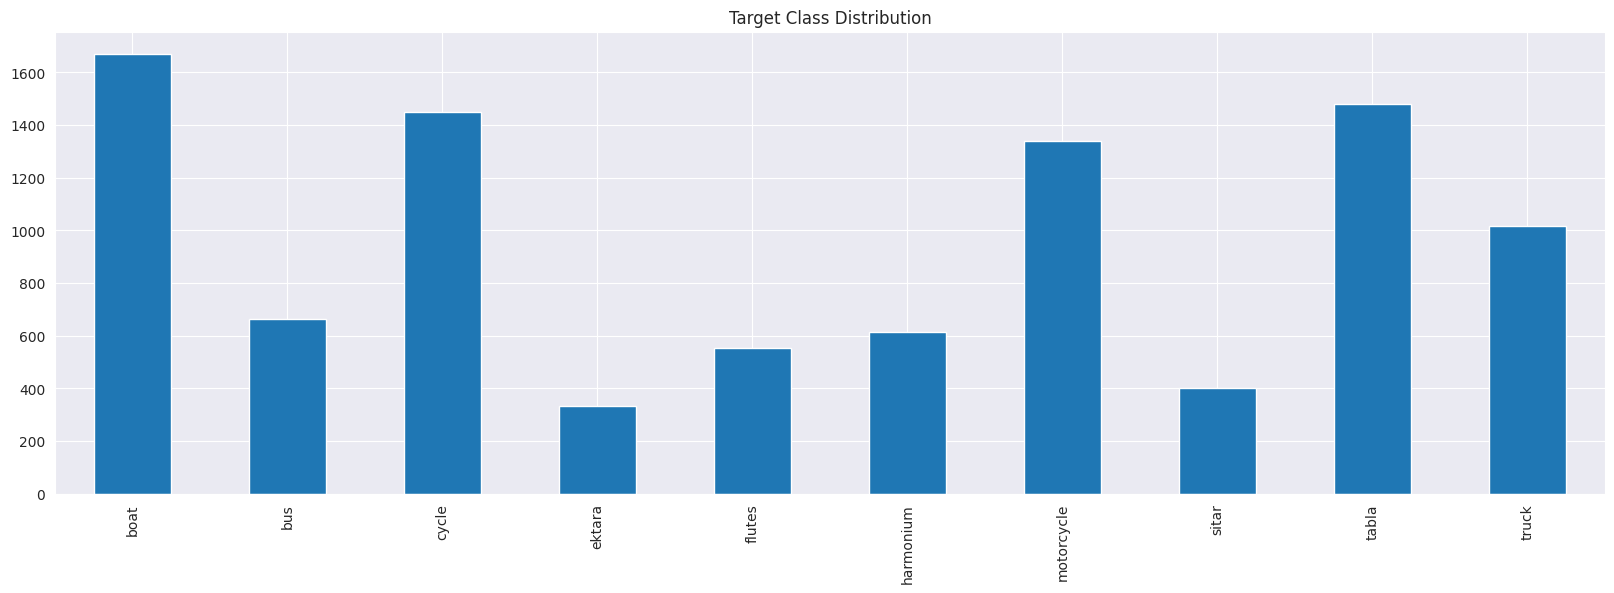

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer().fit(train.labels.apply(lambda x: x.split()))
labels = pd.DataFrame(mlb.transform(train.labels.apply(lambda x: x.split())), columns=mlb.classes_)

fig, ax = plt.subplots(figsize=(20, 6))
labels.sum().plot.bar(title='Target Class Distribution');


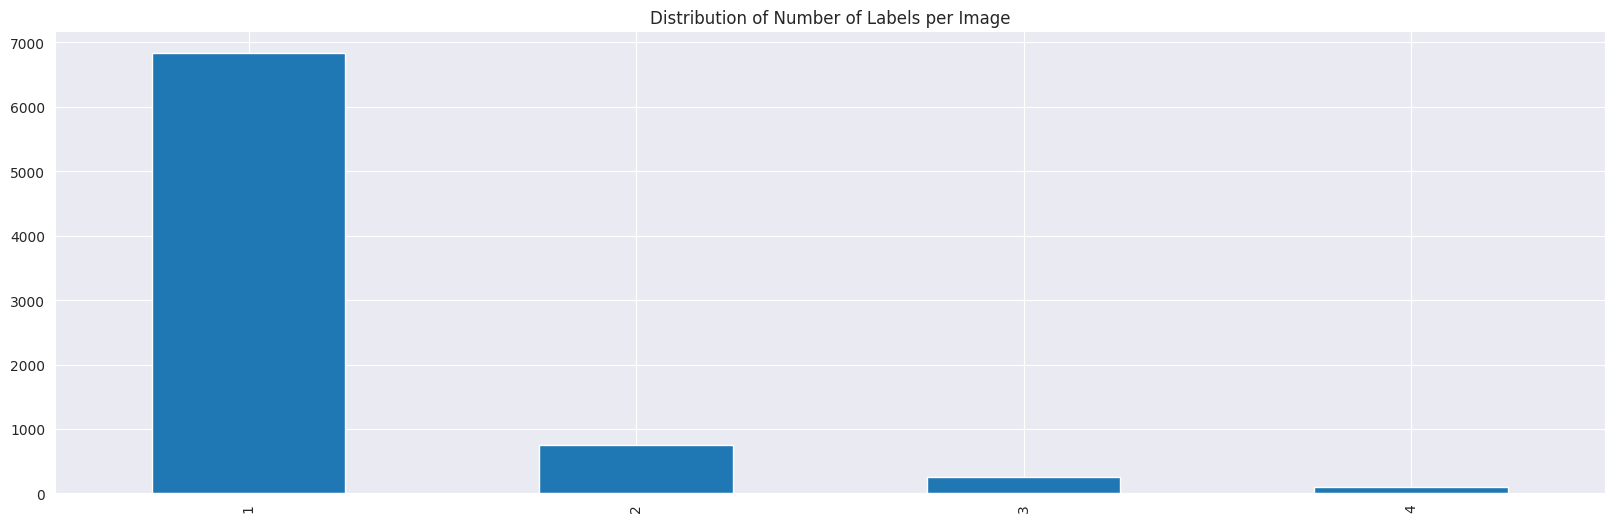

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
labels.sum(axis=1).value_counts().plot.bar(title='Distribution of Number of Labels per Image');

In [ ]:
!pip install -q kaggle

^C


In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d meherunnesashraboni/multi-label-image-classification-dataset

In [ ]:
!unzip multi-label-image-classification-dataset.zip

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

IndexError: ignored

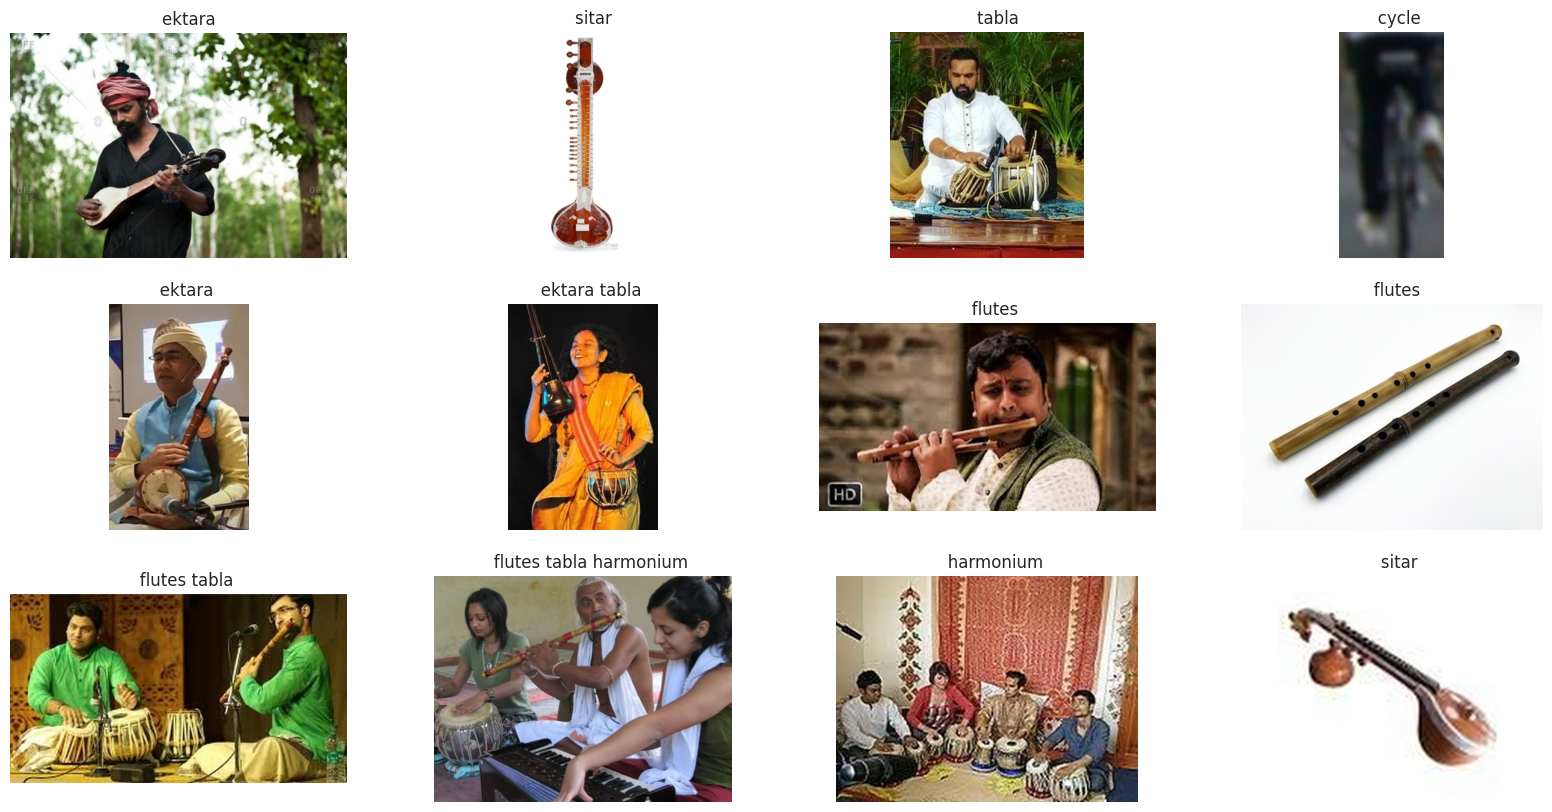

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for i, img in enumerate(train.groupby('labels').first().reset_index().values):
    ax[i//4][i%4].imshow(plt.imread(f"/content/multilabel_modified/images/{img[1]}"))
    ax[i//4][i%4].set_title(img[0])
    ax[i//4][i%4].axis('off')
fig.suptitle('Image Samples', fontsize=18);

preprocessing

In [ ]:
labels = pd.concat([train['Image_Name'], labels], axis=1)
labels.head()

,Image_Name,boat,bus,cycle,ektara,flutes,harmonium,motorcycle,sitar,tabla,truck
0,image1.jpg,0,1,0,0,0,0,0,0,0,0
1,image2.jpg,0,0,0,0,0,0,0,1,0,0
2,image3.jpg,0,0,0,0,1,0,0,0,0,0
3,image4.jpg,0,1,0,0,0,0,0,0,0,0
4,image5.jpg,0,1,0,0,0,0,0,0,0,0


In [ ]:
batch_size=128
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = image_data_generator.flow_from_dataframe(
    dataframe=labels,
    directory='/content/multilabel_modified/images',
    x_col='Image_Name',
    y_col=labels.columns.tolist()[1:],
    class_mode='raw',
    color_mode="rgb",
    target_size=(224, 224),
    batch_size=batch_size,
    subset='training'
)

valid_generator = image_data_generator.flow_from_dataframe(
    dataframe=labels,
    directory='/content/multilabel_modified/images',
    x_col='Image_Name',
    y_col=labels.columns.tolist()[1:],
    class_mode='raw',
    color_mode="rgb",
    target_size=(224, 224),
    batch_size=batch_size,
    subset='validation'
)

Found 7149 validated image filenames.
Found 794 validated image filenames.


model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, None, None, 1280   2257984   
 tional)                     )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 2236682 (8.53 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


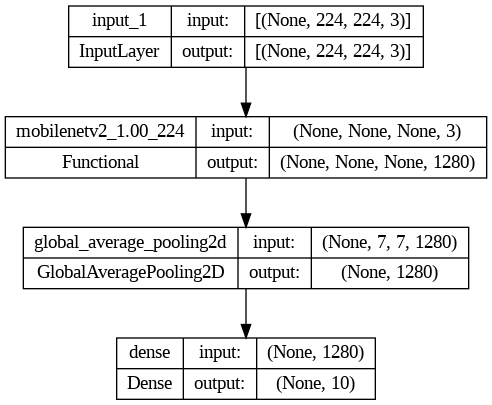

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.MobileNetV2(include_top=False)(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(inputs, outputs)
#model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=1e-4))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
type(train_generator)
type(valid_generator)

keras.src.preprocessing.image.DataFrameIterator

In [ ]:
rlp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.01)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
history = model.fit(train_generator, validation_data=valid_generator, epochs=10, callbacks=[rlp, es])

Epoch 1/10
56/56 [==============================] - 1417s 25s/step - loss: 0.0669 - accuracy: 0.8275 - val_loss: 1.4156 - val_accuracy: 0.5013 - lr: 0.0010
Epoch 2/10
56/56 [==============================] - 1254s 22s/step - loss: 0.0202 - accuracy: 0.8873 - val_loss: 0.5697 - val_accuracy: 0.6209 - lr: 0.0010
Epoch 3/10
56/56 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.8915 
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
56/56 [==============================] - 1250s 22s/step - loss: 0.0133 - accuracy: 0.8915 - val_loss: 0.6773 - val_accuracy: 0.5995 - lr: 0.0010
Epoch 4/10
56/56 [==============================] - 1231s 22s/step - loss: 0.0093 - accuracy: 0.9117 - val_loss: 0.5619 - val_accuracy: 0.6423 - lr: 1.0000e-05
Epoch 5/10
56/56 [==============================] - 1228s 22s/step - loss: 0.0077 - accuracy: 0.9148 - val_loss: 0.4592 - val_accuracy: 0.6814 - lr: 1.0000e-05
Epoch 6/10
56/56 [==============================] -

<Axes: title={'center': 'Model Loss Curve'}>

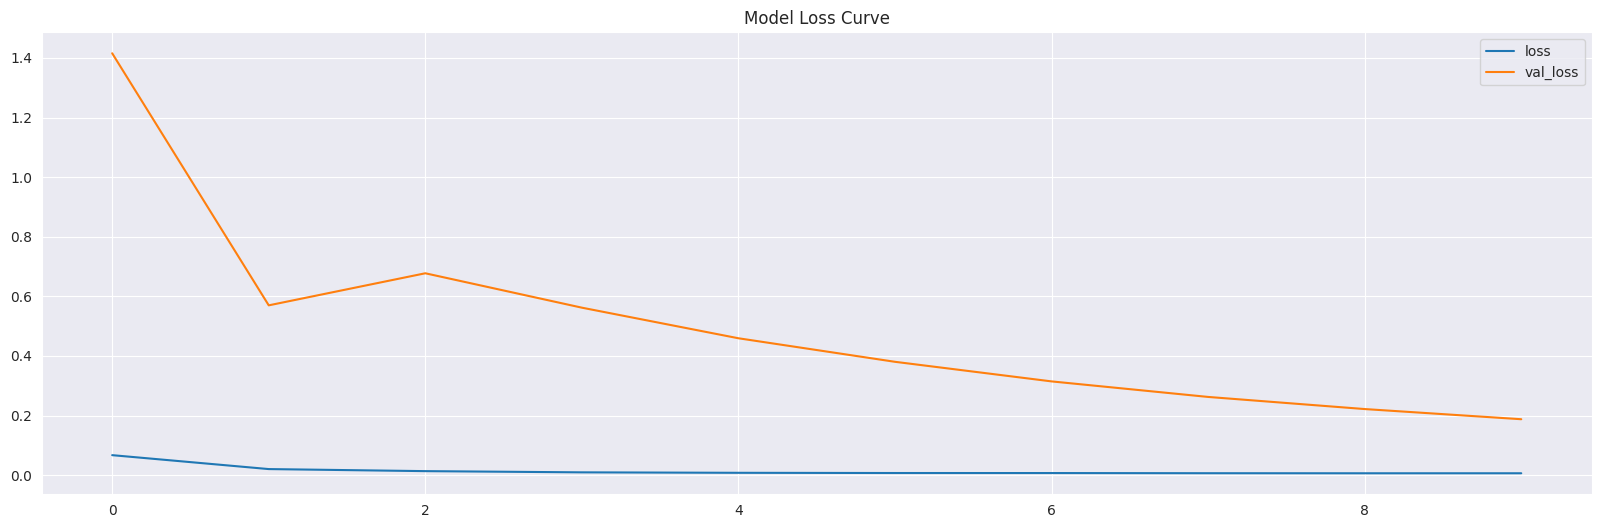

In [ ]:
fix, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(ax=ax, title='Model Loss Curve')

<Axes: title={'center': 'Model Accuracy Curve'}>

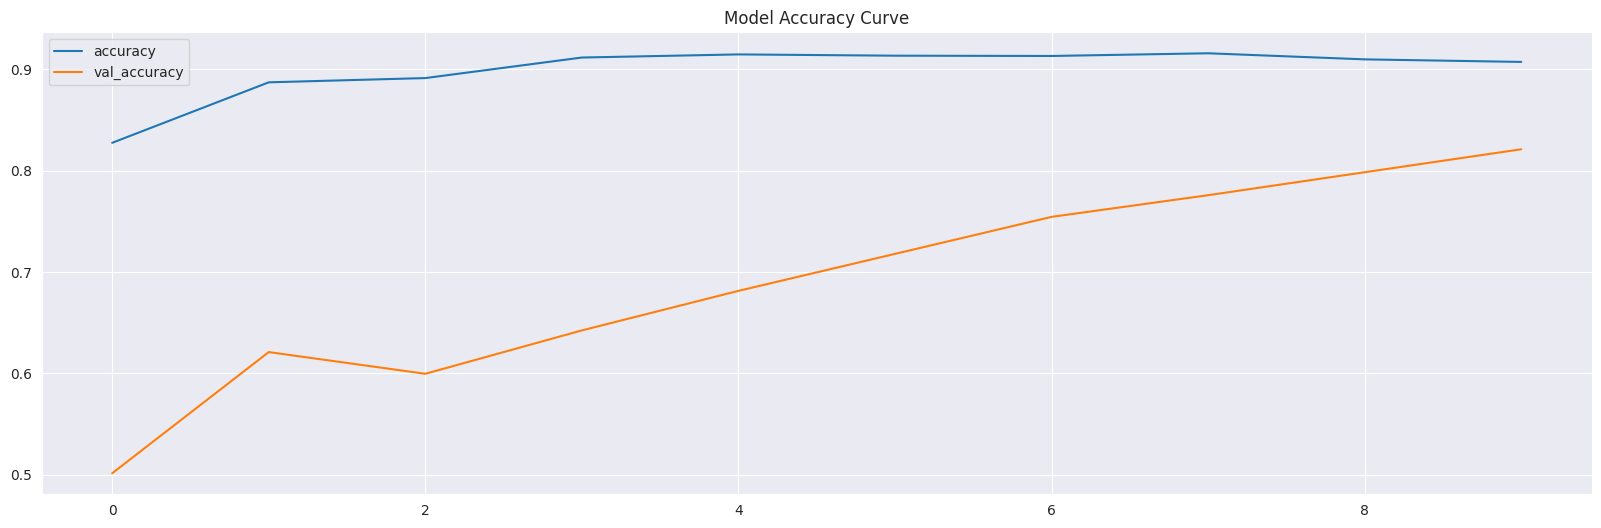

In [ ]:
fix, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(ax=ax, title='Model Accuracy Curve')

In [ ]:
l=pd.DataFrame(history.history)[["loss"]].min()
v_l=pd.DataFrame(history.history)[["val_loss"]].min()
a=pd.DataFrame(history.history)[["accuracy"]].max()
v_a=pd.DataFrame(history.history)[["val_accuracy"]].max()
print(l,v_l,a,v_a)

loss    0.006142
dtype: float64 val_loss    0.187535
dtype: float64 accuracy    0.915932
dtype: float64 val_accuracy    0.821159
dtype: float64


In [ ]:
model.save('mobilenetv2_real2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


prediction

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

# Load the trained model
model = tf.keras.models.load_model('mobilenetv2_real2.h5')

# Define a function to make predictions
def predict_image_labels(image_path, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array =img_array/ 255.0  # Normalize the image
    predictions = model.predict(img_array)
    return predictions


def get_predicted_labels(predictions,class_labels, threshold=0.00001,top_k=5):
    class_labels = ['motorcycle', 'truck', 'boat', 'bus', 'cycle',
       'sitar', 'ektara', 'flutes', 'tabla', 'harmonium']
    sorted_indices = np.argsort(predictions[0])[::-1]
    predicted_labels = []

    for i in sorted_indices[:top_k]:
        if predictions[0][i] >= threshold:
            predicted_labels.append(class_labels[i])

    return predicted_labels

user_image_path = '/content/multilabel_modified/images/image1018.jpg'
predictions = predict_image_labels(user_image_path)
# print(predictions)
class_labels = ['motorcycle', 'truck', 'boat', 'bus', 'cycle', 'sitar', 'ektara', 'flutes', 'tabla', 'harmonium']
predicted_labels = get_predicted_labels(predictions, class_labels)

print("Predicted Labels:", predicted_labels)


1/1 [==============================] - 1s 889ms/step
Predicted Labels: ['boat']
